In [15]:
import optuna
import os
import sys 
import inspect
import utils.h5_utils as h5
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import copy
import h5py

import npyx

# Confusion matrix
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 # necessary to make the text editable
matplotlib.rcParams['ps.fonttype'] = 42

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from pathlib import Path
import torch

SEED = 1234
# Path to the current hdf5 dataset
home = str(Path.home())
DATA_PATH = home + '/Desktop/lisberger_neurons_2022_10_05.h5'


In [161]:
wvf = h5.get_neuron_attr(DATA_PATH, 67, "mean_waveform_preprocessed")

In [162]:
wvf.shape

(240, 9)

In [150]:
wvf = wvf.T

In [154]:
target = 20
repeats = target - wvf.shape[0]
tiling = [wvf[0][None, :]] * repeats
tiled = np.concatenate((*tiling, wvf), axis = 0)

In [155]:
tiled.shape

(20, 240)

In [112]:
wvf = wvf.squeeze()
wvf = np.tile(wvf, (10, 1))

In [115]:
wvf.shape

(10, 240)

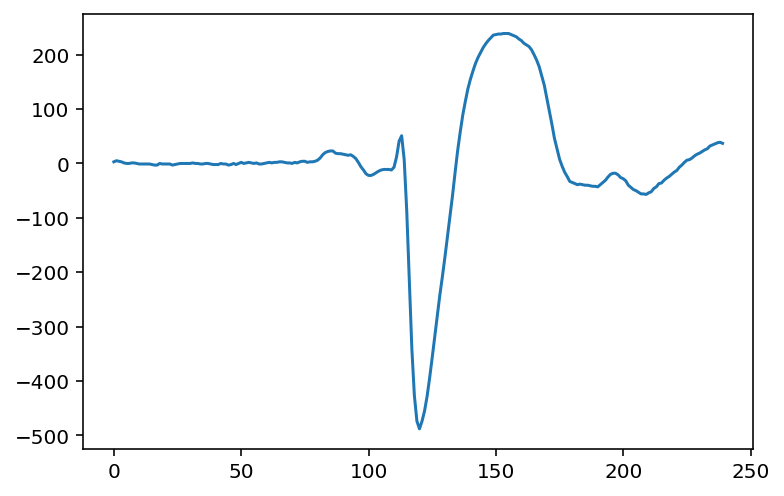

In [121]:
plt.plot(wvf[1]);

In [69]:
wvf.shape

(240, 1)

In [165]:
dataset = h5.NeuronsDataset(DATA_PATH, quality_check=False)

Reading dataset:   0%|          | 0/1047 [00:00<?, ?it/s]

1047 neurons loaded, of which labelled: 0 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute.


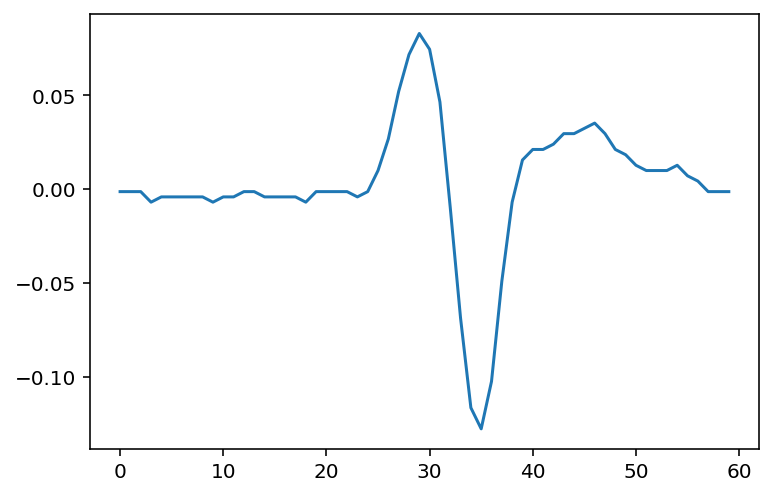

In [183]:
plt.plot(dataset.wf[300].reshape(10, 60)[5])